<a href="https://colab.research.google.com/github/grace1996-beep/week-9_core/blob/main/knn_core.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Defining the question

This project seeks to predict whether a person survived or not

# specifying the data analytic question

The dataset provided has several features including age, ticket ,embarked, fare, and survived. i am going to use the features inorder to predic whether a person survived the accident or not.

# Defining the metrics of success

the steps i will follow to achieve my goal will be

1. loading liblaries and dataset
2. checking for missing values and duplicated values
3. checking for anomalies
4. performing multivariate bivariate and univariate analhysis
5. using KNN classifier for modelling.

# Data relevance

The provided data is relevant for my study.

**importing  liblaries**

In [2]:
import pandas as pd
import numpy as np

# Reading the dataset

In [4]:
data1=pd.read_csv("test.csv")
data1

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
data2=pd.read_csv("train.csv")
data2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


**merging the two datasets**

In [6]:
d = pd.concat([data1, data2])
d


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,NaN
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,NaN
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,NaN
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,NaN
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0.0
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1.0
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0.0
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1.0


# checking the data

In [7]:
#checking for datatypes
d.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Survived       float64
dtype: object

In [9]:
#checking the head of the dataset
d.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,NaN
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,NaN
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,NaN
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,NaN
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,NaN


In [10]:
d.tail(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,0.0
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,1.0
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,0.0
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,1.0
890,891,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,0.0


In [11]:
d.shape

(1309, 12)

# External source validation

I compared my dataset to https://www.kaggle.com/c/titanic

# Tidying up the dataset

In [ ]:
d.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
Survived        418
dtype: int64

In [ ]:
#droping cabin column
drop=d.drop(['Cabin'],axis=1,inplace=True)
drop


In [ ]:
#dropping null values
d.isnull().sum()
surv_drop= d.dropna(subset=['Survived'])
surv_drop
age=surv_drop.dropna(subset=['Age'])
age
age.isnull().sum()
final=age.dropna()
final


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0.0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1.0
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1.0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1.0
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0.0
...,...,...,...,...,...,...,...,...,...,...,...
885,886,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q,0.0
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,0.0
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,1.0
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,1.0


In [ ]:
#checking the shape
final.shape

(712, 11)

In [ ]:
#checking fo datatypes
final.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
Survived       float64
dtype: object

In [ ]:
#checking for unque values
final['Survived'].unique()

array([0., 1.])

In [ ]:
final.Survived=final.Survived.astype(int)
final


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0
...,...,...,...,...,...,...,...,...,...,...,...
885,886,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q,0
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,0
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,1
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,1


In [ ]:
final.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


In [ ]:
#creating dummy values
gender = pd.get_dummies(final['Sex'],drop_first=True)
gender.head()

,male
0,1
1,0
2,0
3,0
4,1


In [ ]:
embark_location = pd.get_dummies(final['Embarked'],drop_first=True)
embark_location.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [ ]:
#dropping columns
final.drop(['Sex', 'Embarked'],axis=1,inplace=True)
final.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Survived
0,1,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1
2,3,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,1
4,5,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0


In [ ]:
#concating dummy created datsets
concat = pd.concat([final,gender,embark_location],axis=1)
concat.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Survived,male,Q,S
0,1,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,0,0,0
2,3,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,1,0,0,1
4,5,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,1,0,1


In [ ]:
#dropping unnecessary columns
survived = concat.drop(['PassengerId','Name','Ticket'], 1)
survived.head()

,Pclass,Age,SibSp,Parch,Fare,Survived,male,Q,S
0,3,22.0,1,0,7.2500,0,1,0,1
1,1,38.0,1,0,71.2833,1,0,0,0
2,3,26.0,0,0,7.9250,1,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,1


In [ ]:
survived.dtypes

Pclass        int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Survived      int64
male          uint8
Q             uint8
S             uint8
dtype: object

In [ ]:
#changing age to type int
survived.Age=final.Age.astype(int)
survived

,Pclass,Age,SibSp,Parch,Fare,Survived,male,Q,S
0,3,22,1,0,7.2500,0,1,0,1
1,1,38,1,0,71.2833,1,0,0,0
2,3,26,0,0,7.9250,1,0,0,1
3,1,35,1,0,53.1000,1,0,0,1
4,3,35,0,0,8.0500,0,1,0,1
...,...,...,...,...,...,...,...,...,...
885,3,39,0,5,29.1250,0,0,1,0
886,2,27,0,0,13.0000,0,1,0,1
887,1,19,0,0,30.0000,1,0,0,1
889,1,26,0,0,30.0000,1,1,0,0


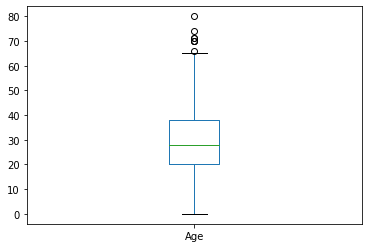

In [ ]:
#identifying outliers 
survived.boxplot(column =['Age'], grid = False)

# Explotory analysis

# Univariate Analysis

In [ ]:
#creating a frequency table to show  occurence of each category here am using 'country'
freq_table=survived.groupby(['Survived']).size().reset_index(name='Count').rename(columns={'Survived':'survive'})
freq_table

,survive,Count
0,0,424
1,1,288


In [ ]:
import matplotlib.pyplot as plt

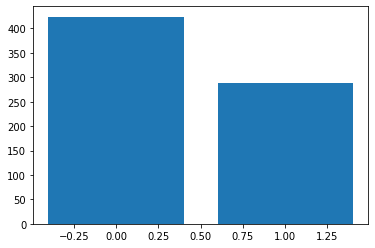

In [ ]:
# bar charts are used to display value associated with categorical data
plt.bar(freq_table['survive'],freq_table['Count'])
plt.show()

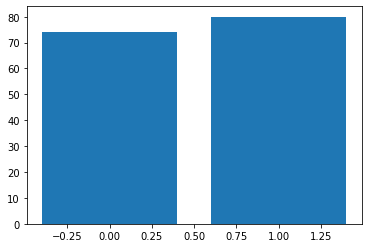

In [ ]:
plt.bar(survived['Survived'],survived['Age'])
plt.show()

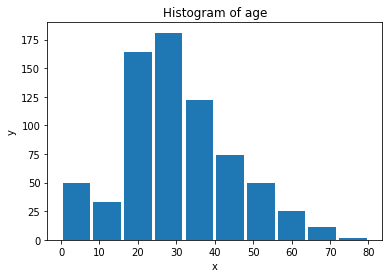

In [ ]:
#histograms show distribution by grouping content
#checking age distribution
population_ages = survived['Age']
bins            = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130]

plt.hist(population_ages, bins=10, histtype='bar', rwidth=0.9)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Histogram of age') 
plt.show()

# Measures of central Tendancy

In [ ]:
cs=survived['Age'].mean()
print(cs)
#median
cl=survived['Fare'].mode()
print(cl)
cm=survived['Pclass'].median()
print(cm)

29.622191011235955
0    13.0
dtype: float64
2.0


In [ ]:
#standard deviation
std=survived['Age'].std()
std


14.502891189620719

In [ ]:
#variance
var=survived['Age'].var()
var


210.3338528579783

In [ ]:
survived["Age"].quantile([0.25,0.5,0.75])

0.25    20.0
0.50    28.0
0.75    38.0
Name: Age, dtype: float64

In [ ]:
survived["Age"].skew()

0.3836449425172507

In [ ]:
#range
max_range = survived["Age"].max()
min_range= survived["Age"].min()

# Calculating the range
max_range- min_range

80

In [ ]:
survived['Age'].describe()

count    712.000000
mean      29.622191
std       14.502891
min        0.000000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


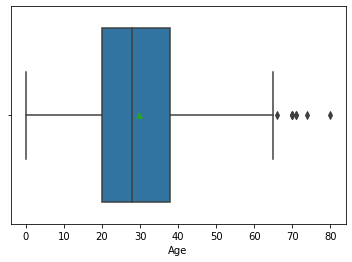

In [ ]:
#boxplot of Respondent Age
import seaborn as sns
sns.boxplot(survived["Age"], showmeans=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


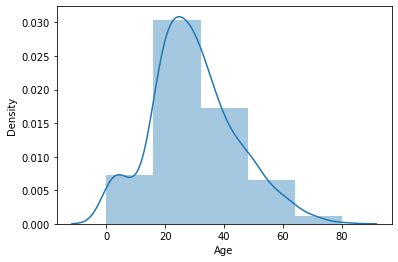

In [ ]:
#plotting histograms
sns.distplot(survived['Age'],bins=5)

# Bivariate analysis

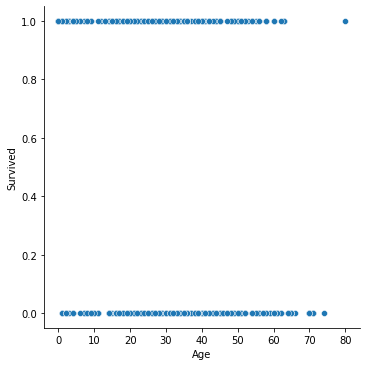

In [ ]:

sns.relplot(x='Age',y='Survived',data=survived)

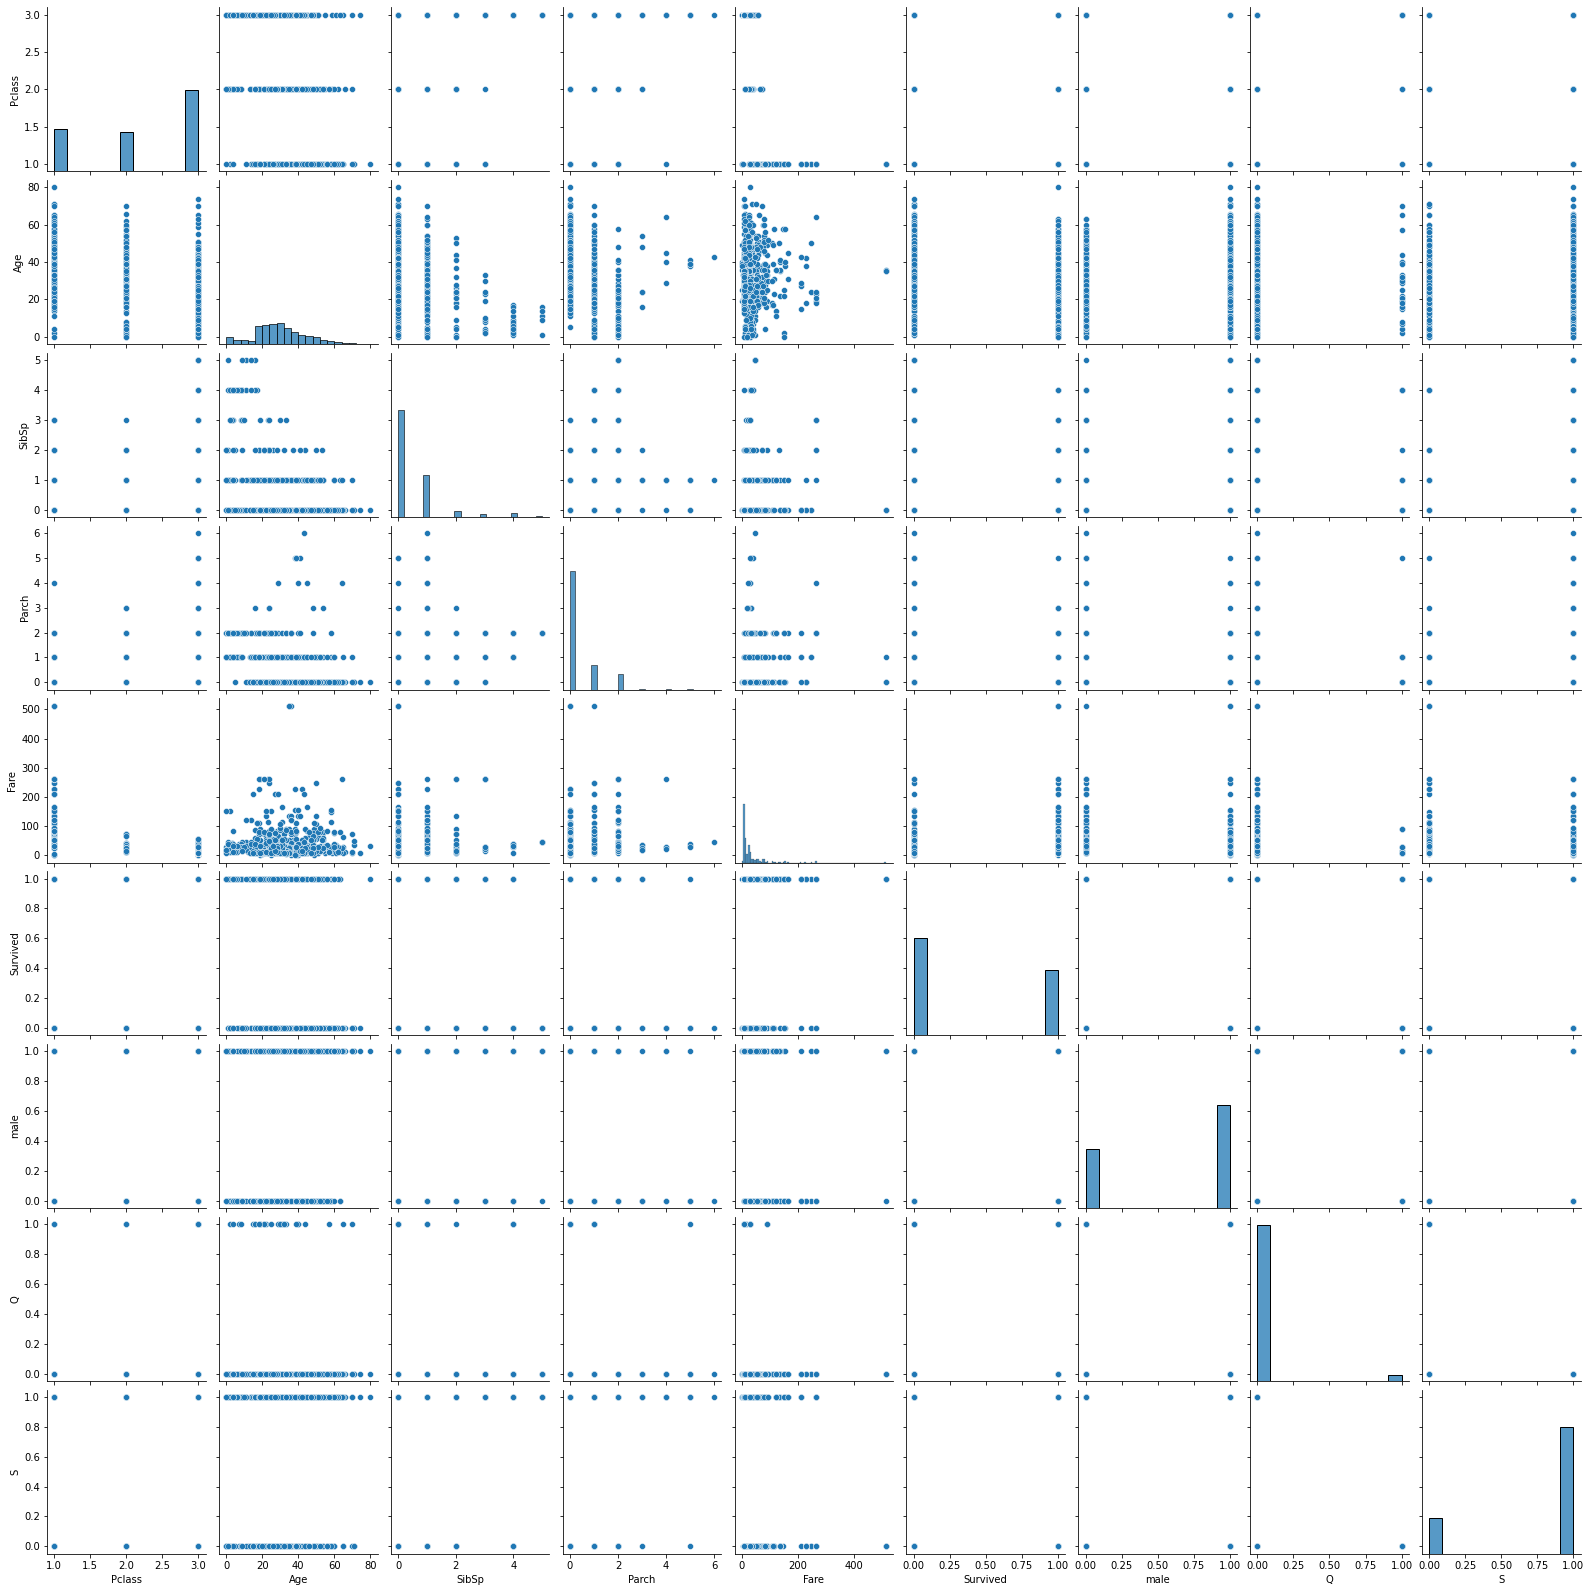

In [ ]:
sns.pairplot(survived)
plt.show()

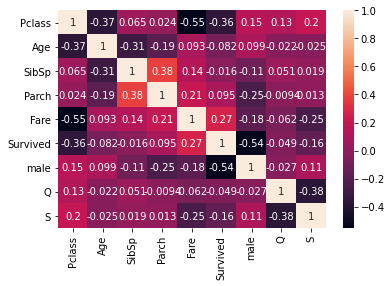

In [ ]:
sns.heatmap(survived.corr(),annot=True)
plt.show()

# Multivariate analysis

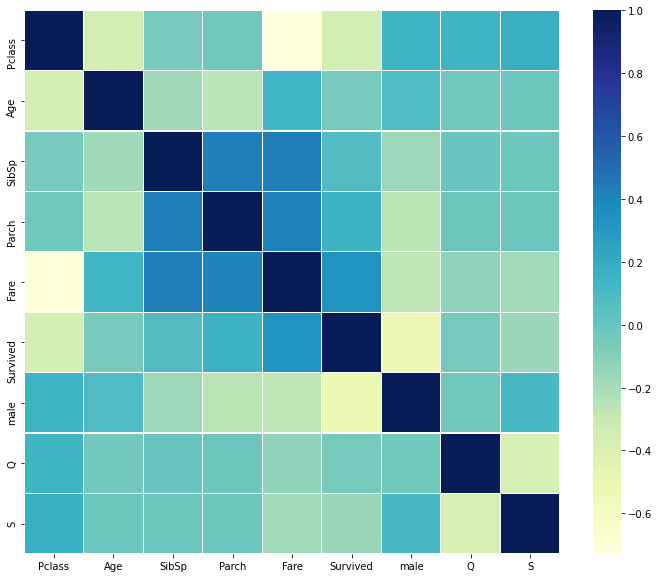

In [ ]:
corrmat = survived.corr(method='spearman')
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corrmat, ax=ax, cmap="YlGnBu", linewidths=0.1)

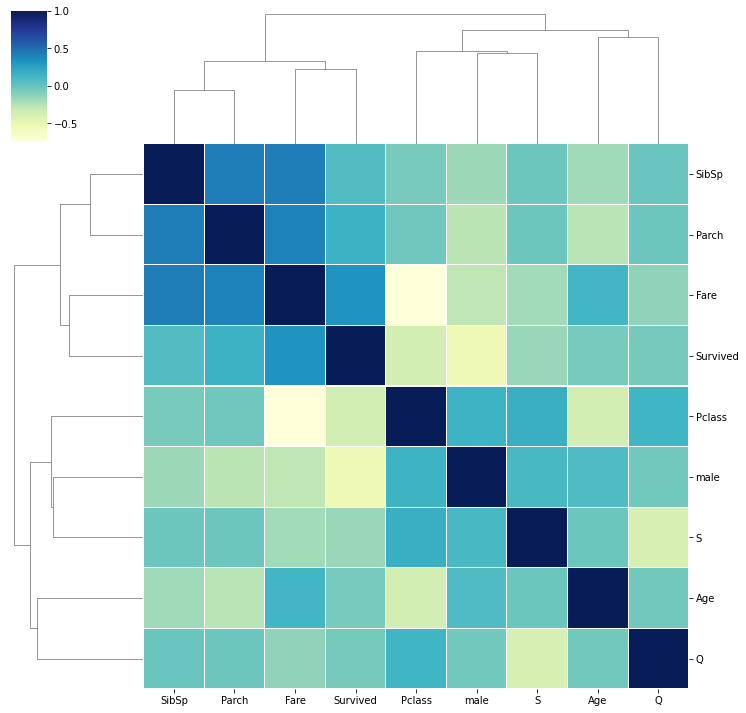

In [ ]:
corrmat = survived.corr(method='spearman')
cg = sns.clustermap(corrmat, cmap="YlGnBu", linewidths=0.1);
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
cg

# implementing the solution

# KNN

**How knn works**

A number of neighbours e.g 10 is chosen

For each datapoint p. the 10 datapoints whose input varisables (x) are most simillart to p( based  on some distance simillarity metric) are selected

Then the avarage output variable of these 10 points are found and used as the predicted output value for p.

if this  is a classification task then the avaraging  might be majority voting.



**defining the x and y variables**

In [ ]:
x=survived.drop(['Survived'],axis=1).values
y=survived['Survived'].values

**Train test split**

In [ ]:
# Train Test Split
# ---
# To avoid over-fitting, we will divide our dataset into training and test splits, 
# which gives us a better idea as to how our algorithm performed during the testing phase. 
# This way our algorithm is tested on un-seen data
# ---
# 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

**Feature scaling**

In [ ]:
# Feature Scaling
# ---
# Before making any actual predictions, it is always a good practice to scale the features 
# so that all of them can be uniformly evaluated.
# ---
# 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

**Training and predictions**

In [ ]:
# Training and Predictions
# ---
# The first step is to import the KNeighborsClassifier class from the sklearn.neighbors library. 
# In the second line, this class is initialized with one parameter, i.e. n_neigbours. 
# This is basically the value for the K. There is no ideal value for K and it is selected after testing and evaluation, 
# however to start out, 5 seems to be the most commonly used value for KNN algorithm.
# ---
# 
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

**making predictions**

In [ ]:
# The final step is to make predictions on our test data
# ---
# 
y_pred = classifier.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1])

the model is working quite well . its predicting values simillar to the test values

**Evaluating the model**

In [ ]:
# Evaluating the Algorithm
# ---
# For evaluating an algorithm, confusion matrix, precision, recall and f1 score are the most commonly used metrics. 
# The confusion_matrix and classification_report methods of the sklearn.metrics can be used to calculate these metrics. 
# ---
# 
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[80 16]
 [12 35]]
              precision    recall  f1-score   support

           0       0.87      0.83      0.85        96
           1       0.69      0.74      0.71        47

    accuracy                           0.80       143
   macro avg       0.78      0.79      0.78       143
weighted avg       0.81      0.80      0.81       143



the model accuracy is 80% which  is okay

# Challenging the solution

**What value for K**

**I am going to test a range of values to see which is the best value for k which produces the lowest error**

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error,r2_score
error = []
for k in range(1,51):
  knn=KNeighborsClassifier(n_neighbors=k)
  y_pred = cross_val_predict(knn,x,y,cv=5)
  error.append(mean_squared_error(y,y_pred))

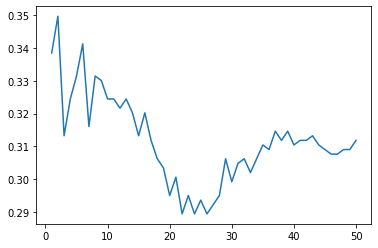

In [ ]:
plt.plot(range(1,51),error)

25 produced the lowest error let me use it to see how the model is going to work.

In [ ]:
# Training and Predictions
# ---
# The first step is to import the KNeighborsClassifier class from the sklearn.neighbors library. 
# In the second line, this class is initialized with one parameter, i.e. n_neigbours. 
# This is basically the value for the K. There is no ideal value for K and it is selected after testing and evaluation, 
# however to start out, 5 seems to be the most commonly used value for KNN algorithm.
# ---
# 
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=25)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                     weights='uniform')

In [ ]:
# The final step is to make predictions on our test data
# ---
# 
y_pred = classifier.predict(X_test)
y_pred

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0])

In [ ]:
# Evaluating the Algorithm
# ---
# For evaluating an algorithm, confusion matrix, precision, recall and f1 score are the most commonly used metrics. 
# The confusion_matrix and classification_report methods of the sklearn.metrics can be used to calculate these metrics. 
# ---
# 
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[86 10]
 [15 32]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.87        96
           1       0.76      0.68      0.72        47

    accuracy                           0.83       143
   macro avg       0.81      0.79      0.80       143
weighted avg       0.82      0.83      0.82       143



the value of accuracy increased from 80% to 83% after changing the k neighbours vslue

# Follow up questions

1. did i have the right data? yes

2. was my question correct? yes